DESCRIPTION

ConnectTel Telecom Company faces the pressing need to address
customer churn, which poses a significant threat to its business
sustainability and growth.

The company's current customer retention strategies lack precision and
effectiveness, resulting in the loss of valuable customers to competitors
To overcome this challenge, ConnectTel aims to develop a
robust customer churn prediction system for which you have been contacted
to handle as a Data Scientist By leveraging advanced analytics and machine
learning techniques on available customer data, the company seeks to
accurately forecast customer churn and implement targeted retention
initiatives.

This proactive approach will enable ConnectTel to reduce customer
attrition, enhance customer loyalty, and maintain a competitive edge in the
highly dynamic and competitive telecommunications industry.

In [1]:
#Import necessary libraries

# For data analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter 

# For Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing the dataset
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\FSDS\CAPSTONE PROJECT\Customer-Churn.csv")


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Drop the clientnum column as it is a unique 
df = df.drop('customerID', axis=1)

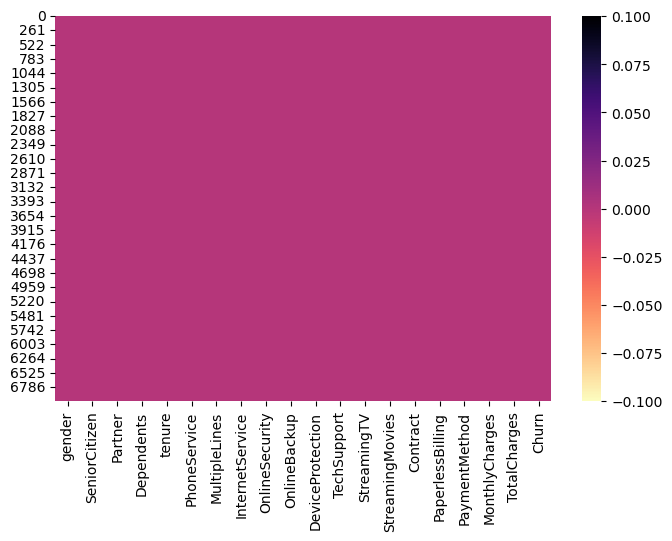

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

<Axes: >

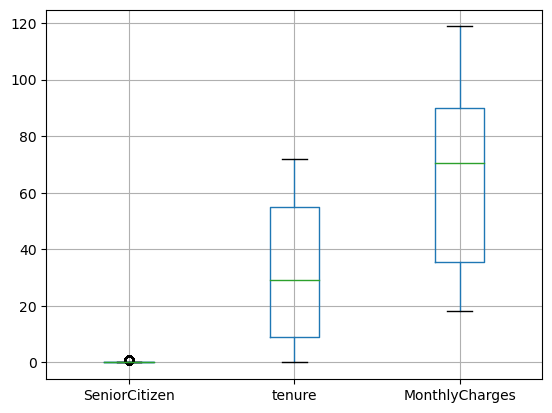

In [7]:
df.boxplot()

### Observation on outliers

We have an outlier on Senior Citizen column, a minimal one that can be overlooked.

# EXPLORATORY DATA ANALYSIS
# UNIVARIATE ANALYSIS

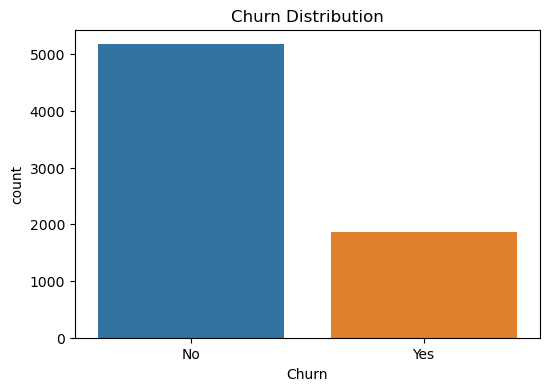

In [8]:
# How many customers have churned

# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

In [9]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Observation

From the above visualization, the total number of customers that churned are 1869

and those that are loyal at the moment are 5174 

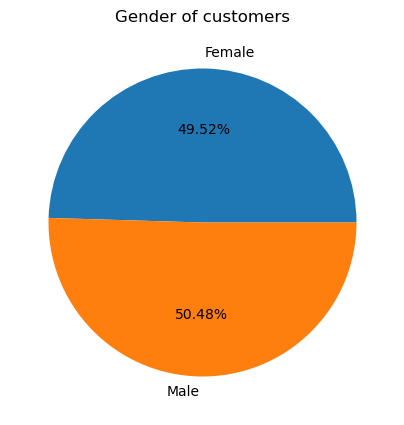

In [10]:
#The distribution of customer gender 
fig, ax = plt.subplots(figsize=(5, 5))
count = Counter(df['gender'])

ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Gender of customers')
plt.show()

### Observation

For the gender distribution, the number of male that uses this service are 50.48% and the number of female are 49.52%.


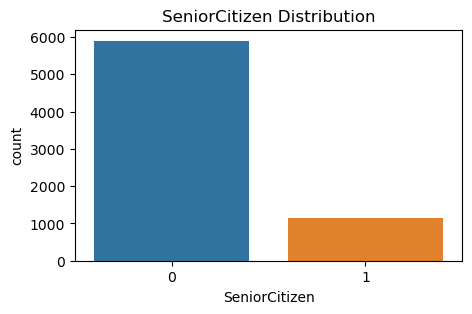

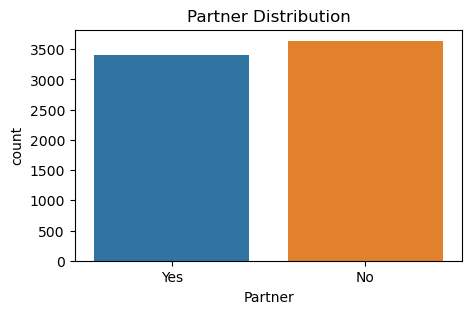

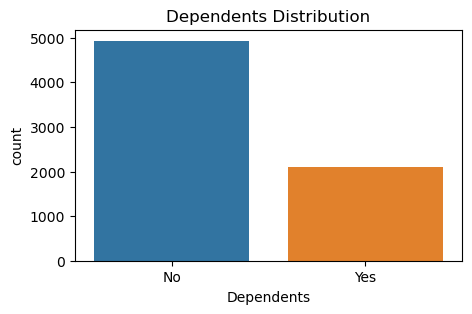

In [11]:
categorical_columns = ['SeniorCitizen', 'Partner', 'Dependents']

for column in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=column)
    plt.title(f"{column} Distribution")
    plt.show()

### Observations
##### Inflence of gender, senior citizen, partner and dependents on the churn behaviour.


1. Senior citizen that subscribe to the service are few, with one representing yes.
2. The number of subscribers on this service that does not have a partner are a bit more than those that have.

3. The number of subscribers on this service that are dependent are few compared to those that are not dependent. 

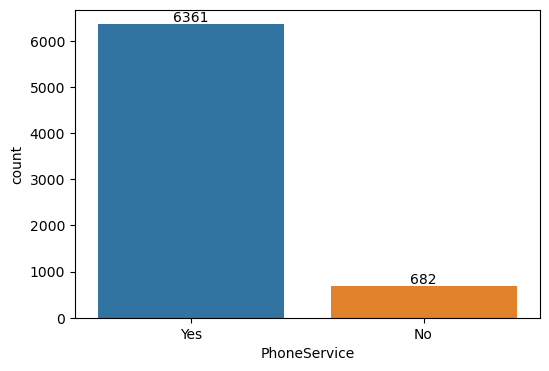

In [12]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df["PhoneService"], order=df["PhoneService"].value_counts(ascending=False).index)
values = df["PhoneService"].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=values);

### Observations
The total number of those that does not have services on their phone are 682.

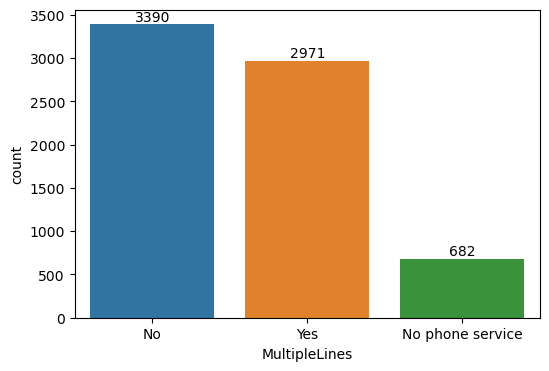

In [13]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df["MultipleLines"], order=df["MultipleLines"].value_counts(ascending=False).index)
values = df["MultipleLines"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Observations

Those that have multiple lines are 2971 and those with no multiple lines are 3390.

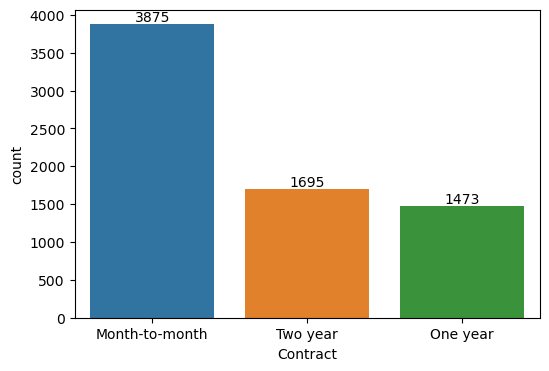

In [14]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df["Contract"], order=df["Contract"].value_counts(ascending=False).index)
values = df["Contract"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Observations

Those that do monthly subscription has a higher number than those with yearly subscription.

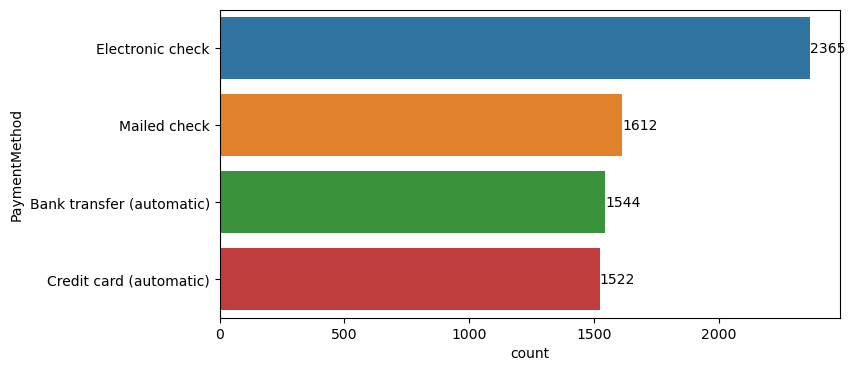

In [15]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(y=df["PaymentMethod"], order=df["PaymentMethod"].value_counts(ascending=False).index)
values = df["PaymentMethod"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Observations

The payment method has Electronic check as the highest mode of payment with 2365 subscribers.

In [16]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# BIVARIATE ANALYSIS

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6,4))

df = df.groupby("gender")["Churn"].sum().reset_index()
sns.countplot(x='gender', data=df, ax=axs[0,0])
axs[0,0].set_title("Total Churn by gender")

#df = df.groupby("Partner")["Churn"].sum().reset_index()
#sns.countplot(x='Partner', data=df, ax=axs[0,1])
#axs[0,1].set_title("Total Churn by Partner")

df = df.groupby("Dependents")["Churn"].sum().reset_index()
sns.coutplot(x='Dependents', data=df, ax=axs[1,0])
axs[1,0].set_title("Total Churn by Dependents")

df = df.groupby("PhoneService")["Churn"].sum().reset_index()
sns.countplot(x='PhoneService', data=df, ax=axs[1,1])
axs[1,1].set_title("Total Churn by PhoneService")

plt.show() 

Text(0.5, 0, 'gender')

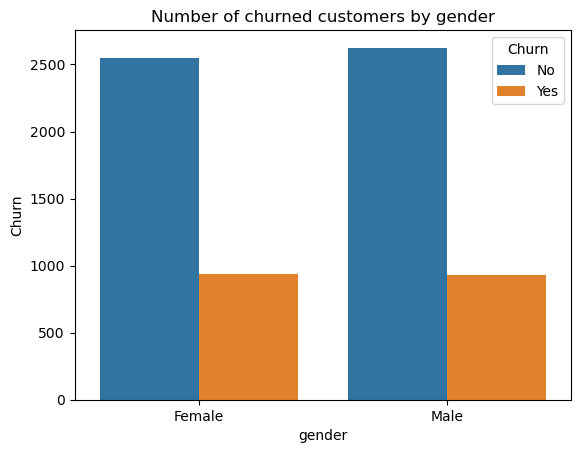

In [17]:
#f, ax = plt.subplot(figsize=(5, 5))
ax = sns.countplot(df, x='gender', hue='Churn')
ax.set_title('Number of churned customers by gender')
ax.set_ylabel('Churn')
ax.set_xlabel('gender')

In [28]:
df[['gender', 'Churn']].value_counts().reset_index(name='Count')


,gender,Churn,Count
0,Male,No,2625
1,Female,No,2549
2,Female,Yes,939
3,Male,Yes,930


### OBSERVATION

Here is a visualization on the number of gender that have churned.

- Total number of male and female that churned are 930 and 939 respectively
- Total number of male and female that did not churn are 2,625 and 2,549 respectively

Text(0.5, 1.0, 'Total Number of churn by MultipleLines')

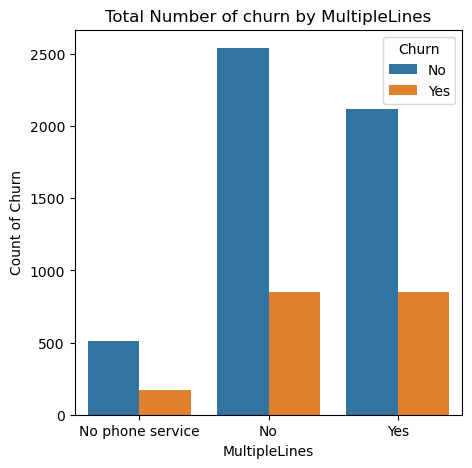

In [18]:
# Investigating the  tenure by the churn feature

plt.figure(figsize=(5,5))
sns.countplot(x='MultipleLines', data=df, hue='Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count of Churn')
plt.title('Total Number of churn by MultipleLines')

In [29]:
df[['MultipleLines', 'Churn']].value_counts().reset_index(name='Count')

,MultipleLines,Churn,Count
0,No,No,2541
1,Yes,No,2121
2,Yes,Yes,850
3,No,Yes,849
4,No phone service,No,512
5,No phone service,Yes,170


### OBSERVATION
Here is a description of those that have multiple lines or not that have either churned or remained loyal:
- Multiple lines that churned - 850
- Multiple lines that never churned - 2121
- No Multiple lines that churned - 849
- No Multiple lines that never churned - 2541
- No Phone service that churned - 170
- No phone service that never churned - 512

Text(0.5, 1.0, 'Total Number of churn by InternetService')

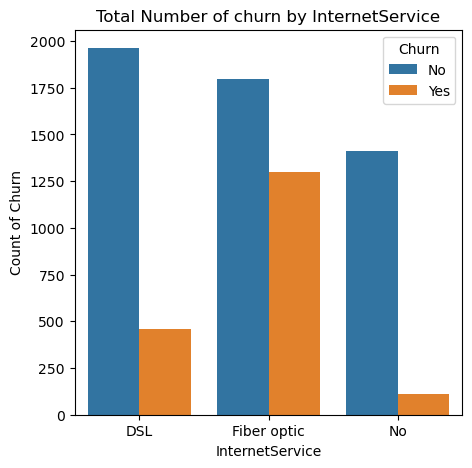

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.xlabel('InternetService')
plt.ylabel('Count of Churn')
plt.title('Total Number of churn by InternetService')

In [30]:
df[['InternetService', 'Churn']].value_counts().reset_index(name='Count')

,InternetService,Churn,Count
0,DSL,No,1962
1,Fiber optic,No,1799
2,No,No,1413
3,Fiber optic,Yes,1297
4,DSL,Yes,459
5,No,Yes,113


### OBSERVATION

- The column Internet Service depict that DSL has the highest number of 1,962 customers that have not churned, with a low number of 459 customers that have churned.
- Fiber Optic has the highest number of 1,297 customers that have churned.
- Those with no internet service at all combined together (churned or not) are 1,526.

Text(0.5, 1.0, 'Total Number of churned customers by PaymentMethod')

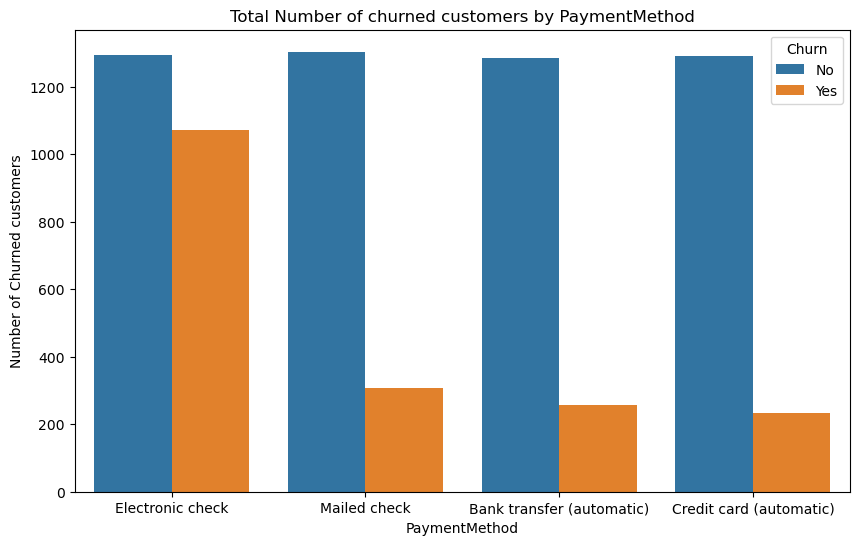

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Number of Churned customers')
plt.title('Total Number of churned customers by PaymentMethod')

In [35]:
df[['PaymentMethod', 'Churn']].value_counts().reset_index(name='Count')

,PaymentMethod,Churn,Count
0,Mailed check,No,1304
1,Electronic check,No,1294
2,Credit card (automatic),No,1290
3,Bank transfer (automatic),No,1286
4,Electronic check,Yes,1071
5,Mailed check,Yes,308
6,Bank transfer (automatic),Yes,258
7,Credit card (automatic),Yes,232


### OBSERVATION
The above description shows the total counts of customers that have churned or not in relation to the payment method. Electronic check being the most preferred method of payment.

# MULTIVARIATE ANALYSIS


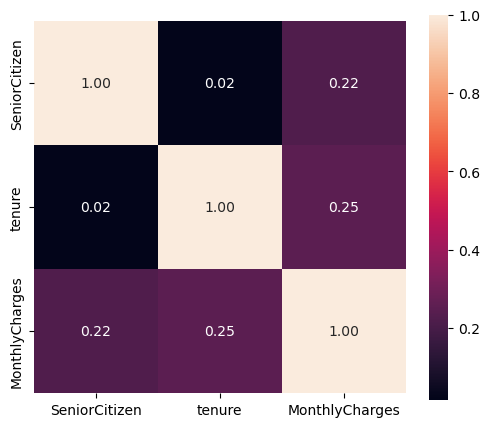

In [23]:
plt.figure(figsize=(6, 5))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size': 10})

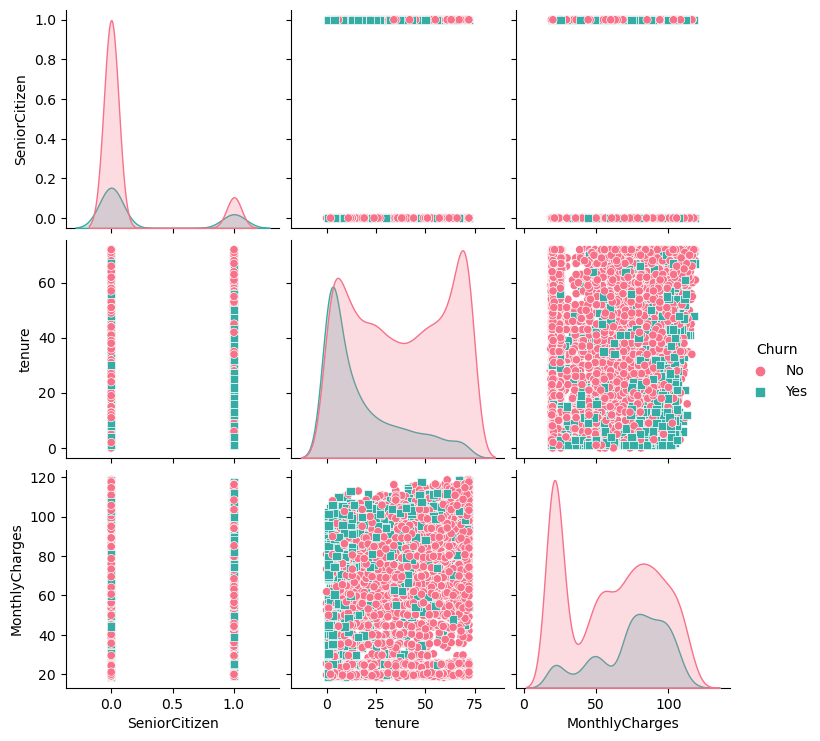

In [37]:
sns.pairplot(df, hue='Churn', markers=["o", "s"], palette="husl")
plt.show()

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Feature Engineering/Data Preprocessing


In [38]:
df1 = df.copy()

In [39]:
df1.shape

(7043, 20)

In [40]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [41]:
df1_encoded = pd.get_dummies(df1, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)


In [52]:
df = pd.get_dummies(df, drop_first=True)

In [42]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [45]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [46]:

catt = (df1.dtypes == 'object')
catt = list(catt[catt].index)

encoder = LabelEncoder()
for i in catt:
    df1[i] = df1[[i]].apply(encoder.fit_transform)


In [47]:
df1.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0


In [48]:
# scaling the dataset
# initialize the MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns = df1.columns)

In [51]:
scaled_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043,1.0


# Machine Learning

In [53]:
# Segment dataset
y = scaled_df.pop('Churn')

In [54]:
scaled_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043


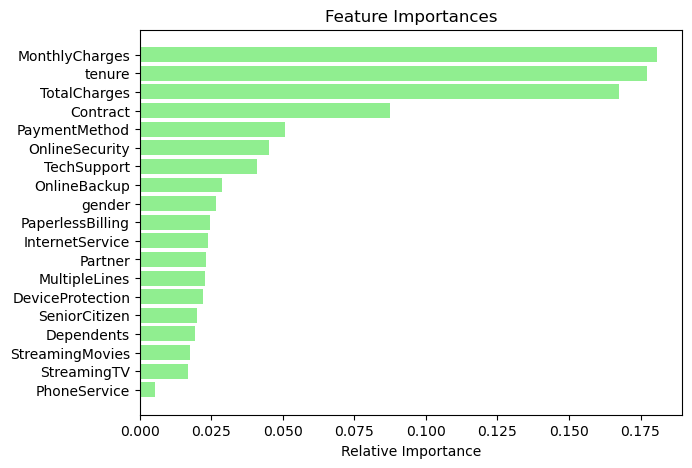

In [56]:
#identifying key featurs from the data set
#plotting a feature importance chart


model = RandomForestClassifier()
# fit the model
model.fit(scaled_df, y)
feature_names = list(df1.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(7, 5))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- SPLITTING DATA INTO TRAINING AND EVALUATION SPLIT
- IMPEMENTING / BUILDING MODEL
- CREATING A PREDICTION

In [57]:
#Importing train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_df,y,test_size=0.3,random_state=1)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
#Instantiate model (The real machine learning)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [60]:
# Create a Prediction file
log_pred = log_reg.predict(x_test)
print('logistic regression accuracy score :',format(log_reg.score(x_test,y_test)))
#log_pred

logistic regression accuracy score : 0.8102224325603408


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
#Instantiate model
dec_tree = DecisionTreeClassifier()

#Training model
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
#create a prediction file
dec_pred = dec_tree.predict(x_test)


In [64]:
# Create a Prediction file
dec_pred = dec_tree.predict(x_test)
print('Decision regression accuracy score :',format(dec_tree.score(x_test,y_test)))


Decision regression accuracy score : 0.7382867960246096


In [65]:
from sklearn.ensemble import GradientBoostingClassifier


In [66]:
#Instantiate model
g_boost = GradientBoostingClassifier()

#train model
g_boost.fit(x_train,y_train)

GradientBoostingClassifier()

In [67]:
# Create a Prediction file
gboost_pred = g_boost.predict(x_test)
print('Gradient Boosting accuracy score :',format(g_boost.score(x_test,y_test)))

Gradient Boosting accuracy score : 0.8102224325603408


In [92]:
# Model Building

# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)


print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.8054898248935163
Precision: 0.6285714285714286
Recall: 0.5416666666666666
F1-score: 0.5818921668362157
AUC-ROC: 0.7175210304942166


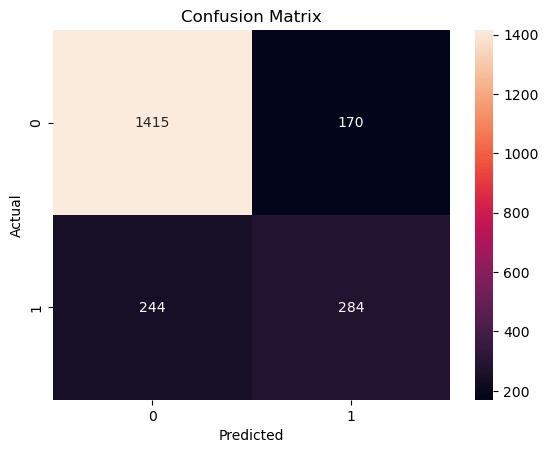

In [91]:
#Create a confusion matrix

rcm = confusion_matrix(y_test, rfy_pred)

#Visualize the confusion Matrix
sns.heatmap(rcm, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [80]:
model = XGBClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

score = model.score(x_test, y_test)
#cross_val = cross_val_score(model, x_test, y_test).mean()
roc_auc = roc_auc_score(y_test, pred)

print('model score:     ' + str(round(score*100, 2)) + '%')
#print('cross val score: ' +str(round(cross_val*100, 2)) + '%')
print('roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')

model score:     80.03%
roc auc score:   71.91%


### Evaluate Model Performance

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
#helpful function for visualizing confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [70]:
#Classification report for logistic regression model
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      1585
         1.0       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



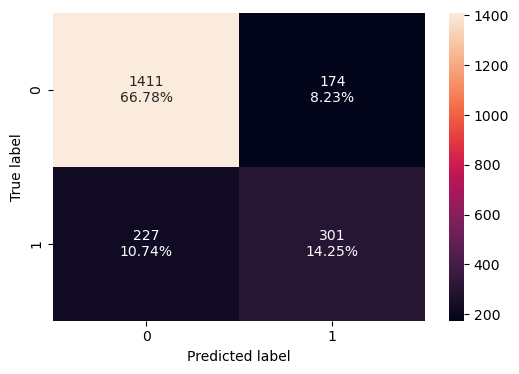

In [71]:
confusion_matrix_sklearn(log_reg,x_test,y_test)

In [84]:
scaled_df.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395


In [85]:
model = XGBClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)

score = model.score(x_test, y_test)
roc_auc = roc_auc_score(y_test, pred)

print('model score:     ' + str(round(score*100, 2)) + '%')
print('roc auc score:   ' + str(round(roc_auc*100, 2)) + '%')

model score:     80.03%
roc auc score:   71.91%


In [99]:
df_test_results = x_test.copy()
df_test_results['Actual Churn'] = y_test
df_test_results['Predicted Churn'] = pred
df_high_risk_customers = df_test_results[df_test_results['Predicted Churn'] == 1]


In [102]:
df_test_results

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual Churn,Predicted Churn
3381,0.0,0.0,0.0,0.0,0.569444,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,0.5,1.0,0.000000,0.612935,0.441807,0.0,0
6180,0.0,1.0,0.0,0.0,0.916667,1.0,1.0,0.5,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.000000,0.837313,0.795865,0.0,0
4829,0.0,0.0,0.0,0.0,0.166667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.266169,0.672588,0.0,0
3737,0.0,0.0,0.0,0.0,0.069444,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.000000,0.321891,0.327106,1.0,0
4249,0.0,0.0,1.0,1.0,0.138889,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.5,1.0,1.000000,0.474129,0.806585,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3934,0.0,0.0,0.0,1.0,0.138889,0.0,0.5,0.0,1.0,1.0,...,1.0,0.0,0.0,0.5,0.0,1.000000,0.218905,0.536141,0.0,0
1351,1.0,0.0,1.0,1.0,0.152778,1.0,0.0,1.0,0.5,0.5,...,0.5,0.5,0.5,0.0,1.0,0.666667,0.021891,0.331087,0.0,0
2048,1.0,1.0,0.0,0.0,0.291667,1.0,0.0,0.5,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.000000,0.781592,0.254671,1.0,0
6218,0.0,0.0,1.0,1.0,0.972222,0.0,0.5,0.0,0.0,1.0,...,1.0,1.0,1.0,0.5,1.0,0.000000,0.399502,0.536907,0.0,0
